In [1]:
import cv2
from matplotlib import pyplot as plt

import label_loader
import bidirectional_resize as bir
import numpy as np


In [2]:
llist = label_loader.load_aicha("/media/zc/Ext4-1TB/AI_challenger_keypoint")
l = llist[30]

anno, img = label_loader.LI_load_resize(l, (512, 512))




Read labels from cache


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


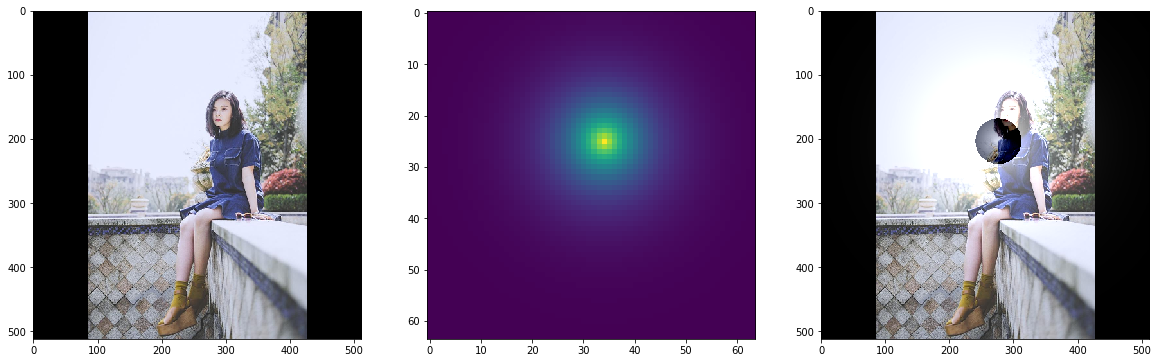

In [3]:
# %matplotlib tk
jhw = label_loader.part_confidence_map(anno, (512, 512), 8)

plt.figure(figsize=(20,10))
heat_overlay = cv2.resize(jhw[0], (512, 512))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(jhw[0])

heat_overlay = heat_overlay*255
heat_overlay = heat_overlay.astype(np.int8)
heat_overlay = heat_overlay[...,np.newaxis]
heat_overlay = heat_overlay + img
plt.subplot(1,3,3)
plt.imshow(heat_overlay)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


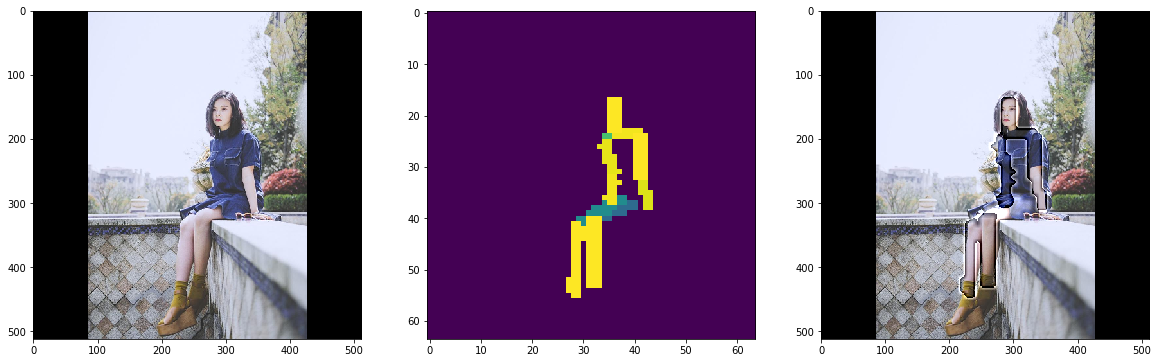

In [4]:
# %matplotlib tk
bhw = label_loader.part_affinity_field(anno, (512, 512), 8)

all_bones = np.amax(bhw, axis = 0)

plt.figure(figsize=(20,10))
heat_overlay = cv2.resize(all_bones, (512, 512))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(all_bones)

heat_overlay = heat_overlay*255
heat_overlay = heat_overlay.astype(np.int8)
heat_overlay = heat_overlay[...,np.newaxis]
heat_overlay = heat_overlay + img
plt.subplot(1,3,3)
plt.imshow(heat_overlay)

In [5]:

gen_PCM_PAF_IMG = label_loader.generator_PCM_PAF_IMG(2, (512, 512), 8)
BC,BA,BI = next(gen_PCM_PAF_IMG)


Read labels from cache


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


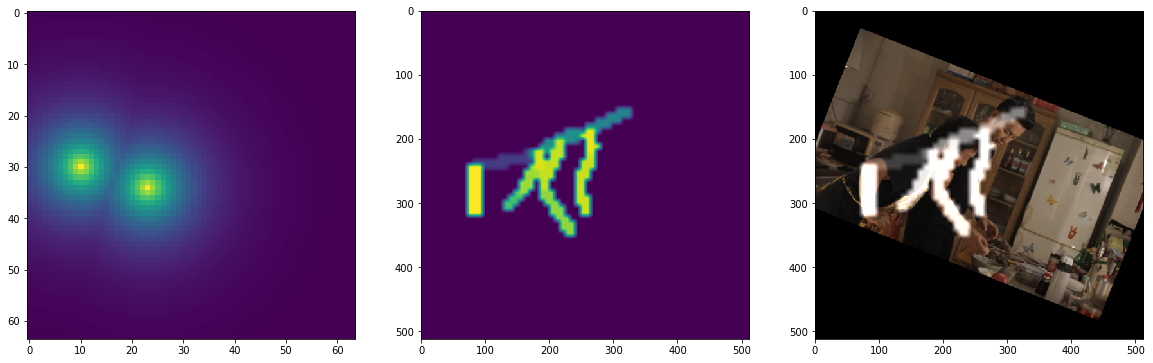

In [6]:

all_bones = np.amax(np.absolute(BA[1,:,:,:]), axis = 2)
heat_overlay = cv2.resize(all_bones, (512, 512))

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(BC[1,:,:,1])
plt.subplot(1,3,2)
plt.imshow(heat_overlay)
plt.subplot(1,3,3)
plt.imshow(BI[1]+heat_overlay[...,np.newaxis])



In [7]:
%matplotlib tk
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
heat = np.amax(BC[1, :, :, 9:11], axis = 2)
plt.imshow(BC[1,:,:,0])
plt.subplot(1,2,2)  
plt.imshow(BI[1])